In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading files
data=pd.read_excel("/home/sakil/Videos/Max_Life/case_study_data.xlsx")
data.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

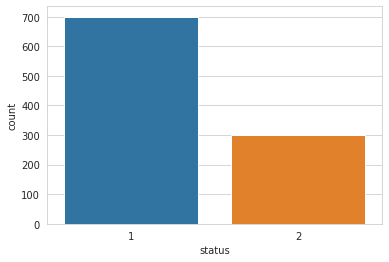

In [83]:
#checking distribution of the target variable
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='status',data=data)

In [85]:
#data is imbalance

data.status.value_counts()

1    700
2    300
Name: status, dtype: int64

In [78]:
data['residing_since'].head()

0    6
1    3
2    5
3    6
4    6
Name: residing_since, dtype: int64

In [54]:
#Checking null values
data.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

# Numerical features

In [48]:
#selecting numerical features
data_numerical=pd.DataFrame(data,columns={"duration","amount","inst_rate","age","num_credits",
                                                     "dependents","status"})

In [49]:
data_numerical.head()

,status,amount,duration,dependents,age,inst_rate,num_credits
0,1,1754,9,2,101,6,3
1,2,8927,72,2,33,3,2
2,1,3144,18,3,74,3,2
3,1,11823,63,3,68,3,2
4,2,7305,36,3,80,5,3


In [50]:
data_numerical.shape

(1000, 7)

# Exploratory data analysis on Numerical features

In [70]:
data_numerical.head()

,status,amount,duration,dependents,age,inst_rate,num_credits
0,1,1754,9,2,101,6,3
1,2,8927,72,2,33,3,2
2,1,3144,18,3,74,3,2
3,1,11823,63,3,68,3,2
4,2,7305,36,3,80,5,3


In [71]:
data_numerical.describe()

,status,amount,duration,dependents,age,inst_rate,num_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.300000,4907.134000,31.449000,2.155000,53.566000,4.606000,2.441000
std,0.458487,4234.100176,18.055564,0.362086,17.065664,1.572016,0.697858
min,1.000000,375.000000,6.000000,2.000000,29.000000,2.000000,2.000000
25%,1.000000,2048.250000,18.000000,2.000000,41.000000,3.000000,2.000000
50%,1.000000,3479.500000,27.000000,2.000000,50.000000,5.000000,2.000000
75%,2.000000,5958.500000,36.000000,2.000000,63.000000,6.000000,3.000000
max,2.000000,27636.000000,108.000000,3.000000,113.000000,6.000000,6.000000


In [73]:
data_numerical.corr()

,status,amount,duration,dependents,age,inst_rate,num_credits
status,1.000000,0.154739,0.214668,-0.003015,-0.090807,0.071108,-0.044738
amount,0.154739,1.000000,0.625128,0.017143,0.032873,-0.272906,0.016287
duration,0.214668,0.625128,1.000000,-0.024283,-0.037106,0.066263,-0.026296
dependents,-0.003015,0.017143,-0.024283,1.000000,0.117814,-0.066704,0.117438
age,-0.090807,0.032873,-0.037106,0.117814,1.000000,0.056342,0.164017
inst_rate,0.071108,-0.272906,0.066263,-0.066704,0.056342,1.000000,0.007988
num_credits,-0.044738,0.016287,-0.026296,0.117438,0.164017,0.007988,1.000000


In [76]:
data_numerical.shape

(1000, 7)

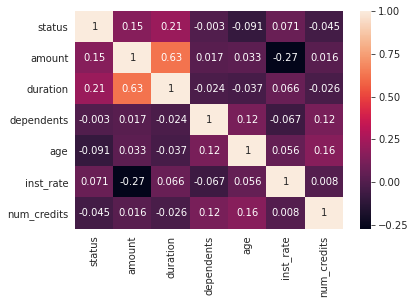

In [75]:
corrMatrix = data_numerical.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Categorical features

In [79]:
#selecting categorical features
data_categorical=pd.DataFrame(data,columns={"checkin_acc","credit_history","purpose","svaing_acc","present_emp_since",
                                           "personal_status","other_debtors","property","inst_plans","housing","job",
                                           "telephone","foreign_worker","residing_since"})

In [80]:
data_categorical.head()

,personal_status,other_debtors,residing_since,purpose,housing,credit_history,telephone,svaing_acc,foreign_worker,inst_plans,property,job,checkin_acc,present_emp_since
0,A93,A101,6,A43,A152,A34,A192,A65,A201,A143,A121,A173,A11,A75
1,A92,A101,3,A43,A152,A32,A191,A61,A201,A143,A121,A173,A12,A73
2,A93,A101,5,A46,A152,A34,A191,A61,A201,A143,A121,A172,A14,A74
3,A93,A103,6,A42,A153,A32,A191,A61,A201,A143,A122,A173,A11,A74
4,A93,A101,6,A40,A153,A33,A191,A61,A201,A143,A124,A173,A11,A73


* personal_status
* other_debtors
* housing
* credit_history
* svaing_acc
* foreign_worker
* inst_plans
* property
* job
* checkin_acc
* present_emp_since
* residing_since



In [81]:
data_categorical.shape

(1000, 14)

# Exploratory data analysis on Categorical features

In [82]:
#counting the number of unique categories in the featuew
for i in data_categorical.columns:
    #print(i)
    print(i,":::" ,len(data_categorical[i].unique()))

personal_status ::: 4
other_debtors ::: 3
residing_since ::: 4
purpose ::: 10
housing ::: 3
credit_history ::: 5
telephone ::: 2
svaing_acc ::: 5
foreign_worker ::: 2
inst_plans ::: 3
property ::: 4
job ::: 4
checkin_acc ::: 4
present_emp_since ::: 5


personal_status ::: 4-----3
other_debtors ::: 3-------2
residing_since ::: 4-------3
housing ::: 3--------------2
credit_history ::: 5--------4
svaing_acc ::: 5------------4
foreign_worker ::: 2---------1
inst_plans ::: 3-------------2
property ::: 4---------------3
job ::: 4--------------------3
checkin_acc ::: 4------------3
present_emp_since ::: 5------4

In [41]:
data_categorical.personal_status.value_counts()

A93    548
A92    310
A94     92
A91     50
Name: personal_status, dtype: int64

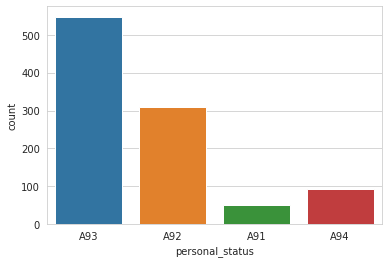

In [28]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='personal_status',data=data_categorical)

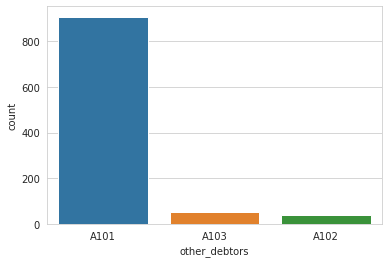

In [29]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='other_debtors',data=data_categorical)

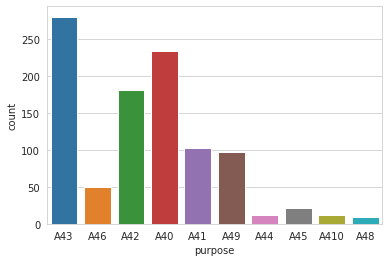

In [30]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=data_categorical)

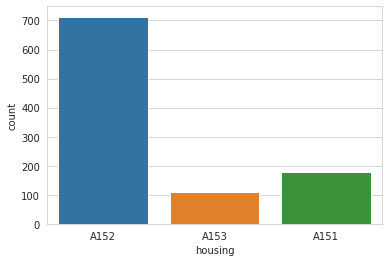

In [60]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='housing',data=data_categorical)

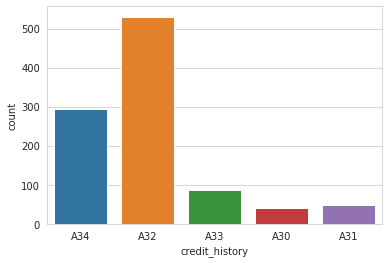

In [61]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='credit_history',data=data_categorical)

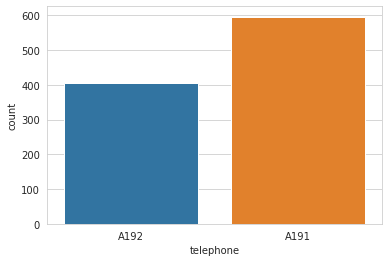

In [62]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='telephone',data=data_categorical)

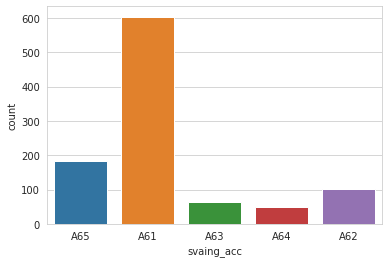

In [63]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='svaing_acc',data=data_categorical)

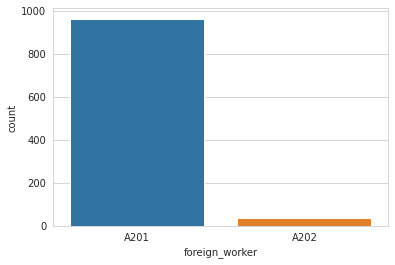

In [64]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='foreign_worker',data=data_categorical)

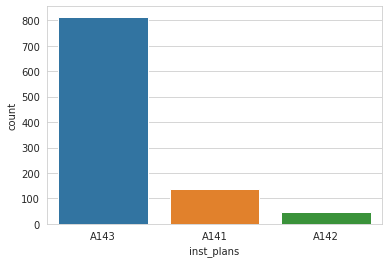

In [65]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='inst_plans',data=data_categorical)

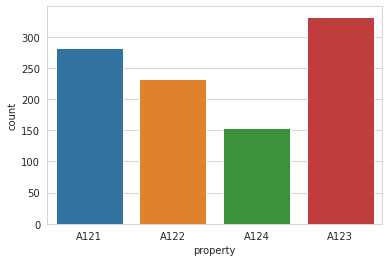

In [66]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='property',data=data_categorical)

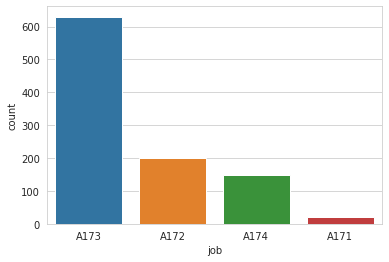

In [67]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='job',data=data_categorical)

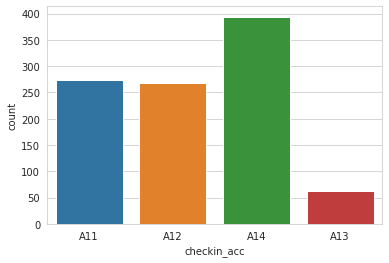

In [68]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='checkin_acc',data=data_categorical)

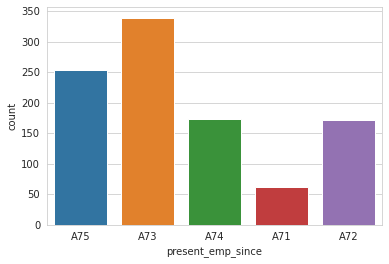

In [69]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='present_emp_since',data=data_categorical)